In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
no_sugar = diabetes.loc[diabetes.Outcome==0]
no_sugar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,167.0,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,29.0,167.0,25.6,0.201,30,0
7,10,115.0,72.0,29.0,167.0,35.3,0.134,29,0
10,4,110.0,92.0,29.0,167.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
428,0,135.0,94.0,46.0,145.0,40.6,0.284,26,0
430,2,99.0,72.0,29.0,167.0,22.2,0.108,23,0
431,3,89.0,74.0,16.0,85.0,30.4,0.551,38,0
432,1,80.0,74.0,11.0,60.0,30.0,0.527,22,0


In [4]:
768-500

268

In [7]:
sugar = diabetes.loc[diabetes.Outcome==1]
sugar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [9]:
no_sugar = no_sugar.iloc[:268]
no_sugar

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
428,0,135,94,46,145,40.6,0.284,26,0
430,2,99,0,0,0,22.2,0.108,23,0
431,3,89,74,16,85,30.4,0.551,38,0
432,1,80,74,11,60,30.0,0.527,22,0


In [12]:
diabetes = no_sugar.append(sugar)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


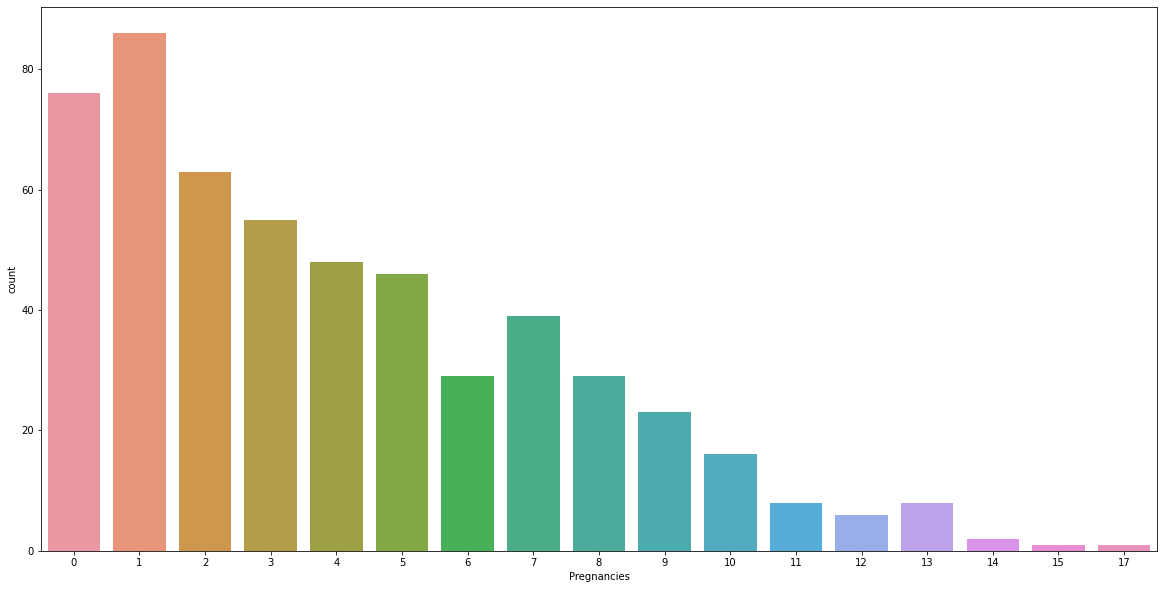

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.Pregnancies)
plt.show()

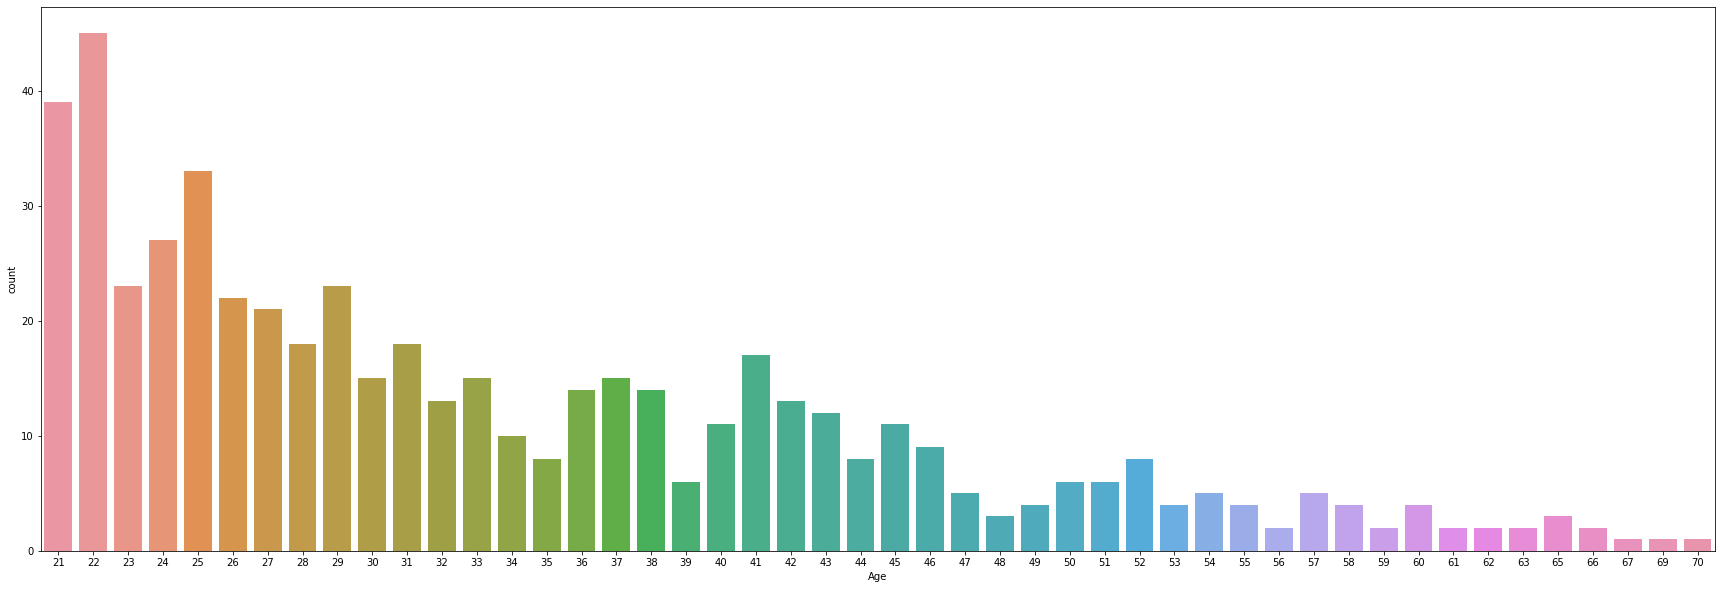

In [14]:
plt.figure(figsize=(30, 10))
sns.countplot(x=diabetes.Age)
plt.show()

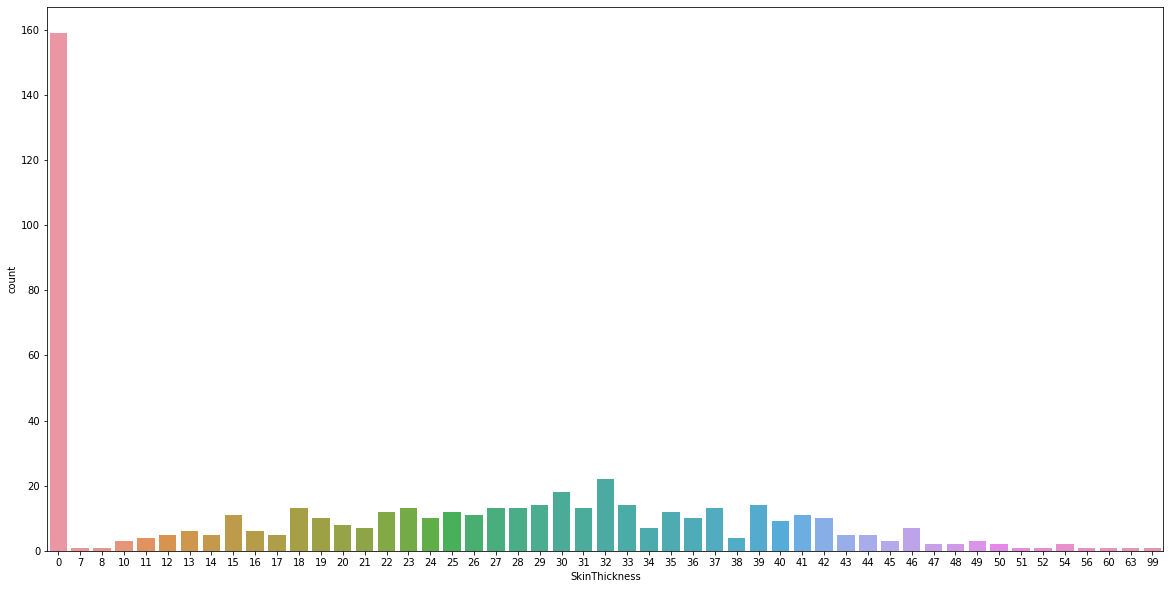

In [15]:
plt.figure(figsize=(20, 10))
sns.countplot(x=diabetes.SkinThickness)
plt.show()

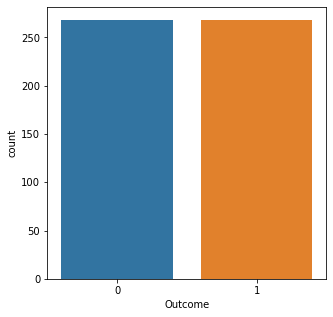

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(x=diabetes.Outcome)
plt.show()

In [17]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.046642,125.597015,69.386194,20.968284,85.251866,32.609888,0.494119,33.835821,0.500000
std,3.441863,33.763414,19.720337,16.328317,124.703199,8.040323,0.348858,11.348148,0.500467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,27.900000,0.254000,24.750000,0.000000
50%,3.000000,122.000000,72.000000,23.000000,30.500000,32.750000,0.389000,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,135.000000,37.025000,0.656250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [18]:
df = diabetes.copy()

In [19]:
# Replace zeroes
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness", "BMI", "Insulin"]

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [20]:
diabetes = df.copy()

In [21]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,4.046642,126.772388,72.878731,29.570896,167.194030,33.102425,0.494119,33.835821,0.500000
std,3.441863,31.482683,11.959520,8.998578,92.391445,6.964528,0.348858,11.348148,0.500467
min,0.000000,44.000000,30.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,103.000000,66.000000,26.000000,130.000000,28.375000,0.254000,24.750000,0.000000
50%,3.000000,123.000000,72.000000,29.000000,167.000000,32.900000,0.389000,31.000000,0.500000
75%,6.000000,147.000000,80.000000,33.000000,167.000000,37.025000,0.656250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.000000


In [22]:
x_train, x_test, y_train, y_test = train_test_split(diabetes.drop(["Outcome"], axis=1), diabetes.Outcome, random_state=0)

In [23]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
277,0,104.0,64.0,23.0,116.0,27.8,0.454,23
569,0,121.0,66.0,30.0,165.0,34.3,0.203,33
320,4,129.0,60.0,12.0,231.0,27.5,0.527,31
388,5,144.0,82.0,26.0,285.0,32.0,0.452,58
757,0,123.0,72.0,29.0,167.0,36.3,0.258,52
...,...,...,...,...,...,...,...,...
296,2,146.0,70.0,38.0,360.0,28.0,0.337,29
619,0,119.0,72.0,29.0,167.0,32.4,0.141,24
322,0,124.0,70.0,20.0,167.0,27.4,0.254,36
740,11,120.0,80.0,37.0,150.0,42.3,0.785,48


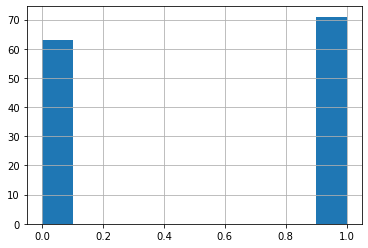

In [24]:
y_test.hist()

In [25]:
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

In [26]:
classifier = KNeighborsClassifier(n_neighbors=15, p=2, metric="euclidean")

In [27]:
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [28]:
y_pred = classifier.predict(x_test)
con_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
np.transpose(con_matrix)

array([[42, 16],
       [21, 55]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69        63
           1       0.72      0.77      0.75        71

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.72      0.72      0.72       134

